<a href="https://www.kaggle.com/code/zeeshanahmadyar/placements-dataset-regression-matrics?scriptVersionId=282592986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placementcsv/placement.csv


# **Load Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/placementcsv/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


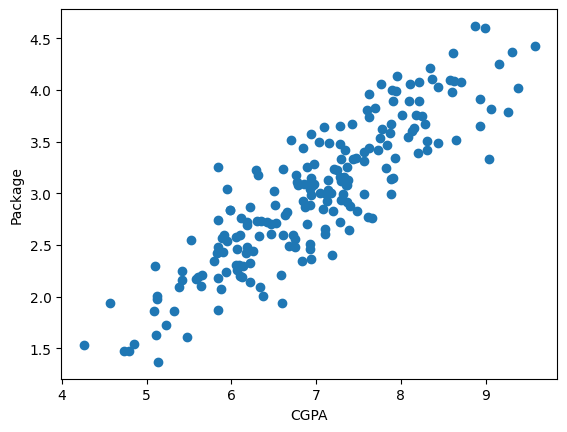

In [3]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

# **Divede Datainto X abd y**

In [4]:
X = df.iloc[:, [0]]
y = df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

# **Draw Graph to check linear line**

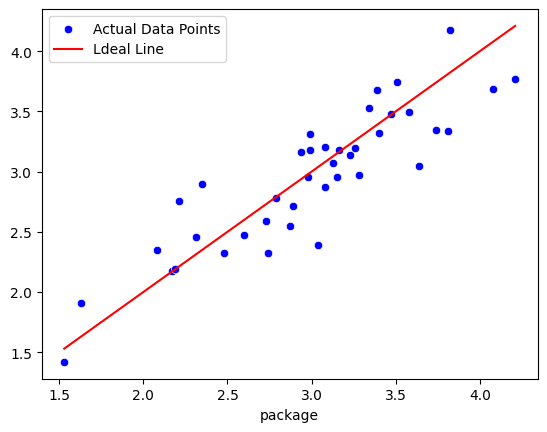

In [9]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ldeal Line')
plt.legend()
plt.show()

# **Now we check error in the model**

In [10]:
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 0.23150985393278384


In [11]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 0.08417638361329663


In [12]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.2901316659954522


In [13]:
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.7730984312051672


In [14]:
r2 = r2_score(y_test, y_pred)

In [15]:
X_test.shape

(40, 1)

In [16]:
1 - ((1 - r2) * (40 - 1) / (40 - 1 - 1))

0.7671273372895138

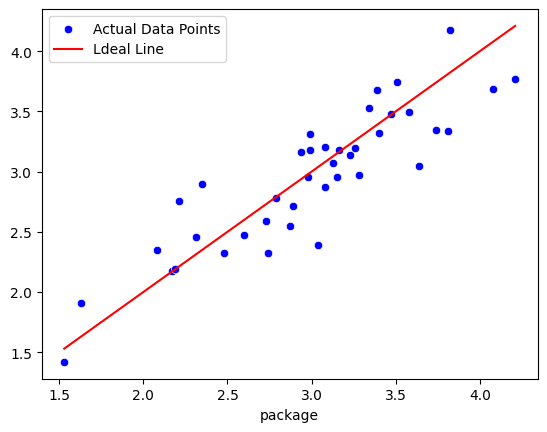

In [17]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ldeal Line')
plt.legend()
plt.show()

In [18]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.883015,3.26
1,5.12,0.831364,1.98
2,7.82,0.109838,3.25
3,7.42,0.399319,3.67
4,6.94,0.253648,3.57


# **Again Plot Graph**

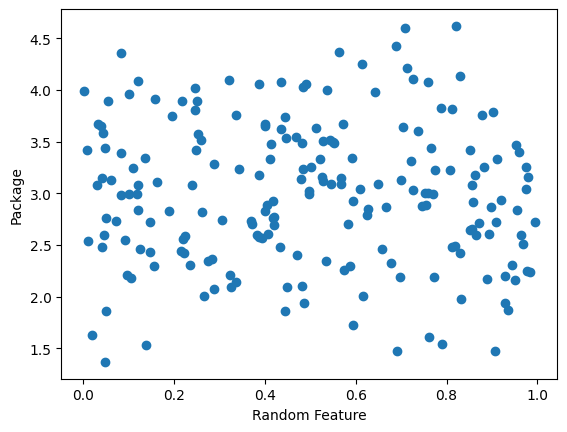

In [19]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('Random Feature')
plt.ylabel('Package')
plt.show()

In [20]:
X = new_df1.iloc[:, 0:2] 
y = new_df1.iloc[:, -1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)

In [25]:
print('R2 Score:', r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score: 0.7766866245691562


In [26]:
1 - ((1-r2) * (40 - 1) / (40 - 1 - 2))

0.7646156313026241